# 多項式回帰

## ライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## データセットのインポート

In [11]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values # levelの列だけを抽出（levelがわかれば、Positionの列もわかるから）
y = dataset.iloc[:, -1].values

X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [13]:
# NGな列指定
# 以下ではPandasの一元配列を返す
# 機械学習のライブラリでは、[[]]で二重配列を返す必要がある（2D配列）
NG_X = dataset.iloc[:, 1].values
NG_X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## データセットを使った線形回帰モデルの訓練(単回帰分析)

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## データセットを使った多項式回帰モデルの訓練

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X) # 新しい独立変数を定義
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [16]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## 結果の可視化（線形回帰）

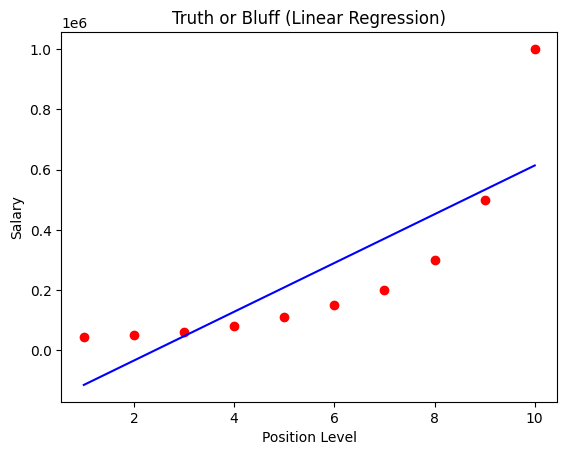

In [18]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## 結果の可視化（多項式回帰）

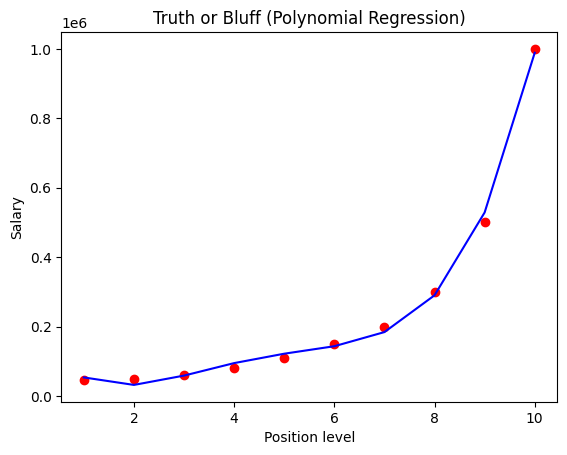

In [19]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## 結果の可視化（多項式回帰、より滑らかなカーブ）

/var/folders/6p/tytvzrts6c78tztzqyltfbbw0000gn/T/ipykernel_16280/3061864919.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


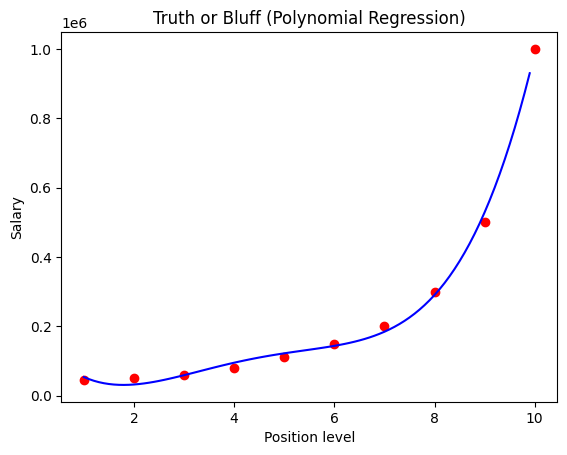

In [20]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## 線形回帰モデルによる予測




In [ ]:
lin_reg.predict([[6.5]]) 

array([330378.78787879])

## 多項式回帰モデルによる予測

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])